# Mini Project

## 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand



### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

### 2. 데이터 시각화 
4종류 이상의 시각화 기법을 사용하여 그래프 그리기
Seaborn 라이브러리 활용

### 3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

### 4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

가설: 봄, 가을에 대여량이 많을 것이다

In [84]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
# 읽어들일 파일 경로 : /dataset/bike_sharing_demand_train.csv
filepath = "./dataset/bike_sharing_demand_train.csv"
data = pd.read_csv(filepath)

In [86]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [87]:
data['datetime'] = data['datetime'].astype('datetime64')

In [88]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second

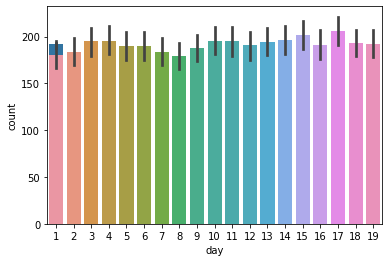

In [91]:
# 빼는게 좋은 값들

# 분이 0분밖에 없음
sns.barplot(x='minute', y='count', data=data)

# 19일까지밖에 없음
sns.barplot(x='day', y='count', data=data)

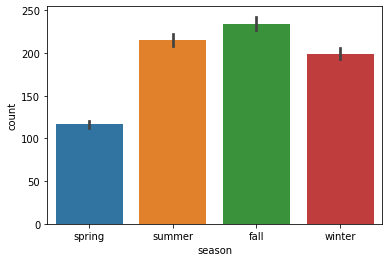

In [83]:
# 가설: 봄, 가을에 제일 대여량이 많을 것이다.

data.season = data.season.replace([1,2,3,4], ['spring', 'summer', 'fall', 'winter'])
sns.barplot(x='season', y='count', data=data)

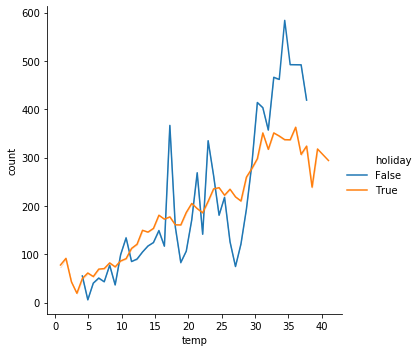

In [65]:
# 봄이 제일 적었다. 계절별 습도가 원인이 아닐까 싶어서 분석
sns.relplot(x="humidity", y="count", kind="line", label="temp", hue="holiday", data=data, ci=False)

<Figure size 864x576 with 0 Axes>

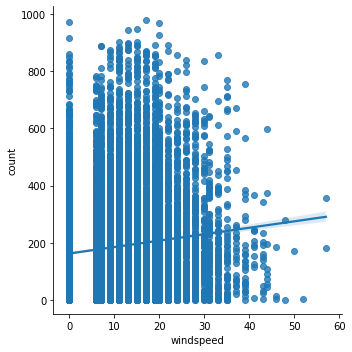

In [82]:
# 가설: 풍속에 따라 대여량이 다를것이다. 바람이 너무 세면 대여량이 적을 것이다.
plt.figure(figsize=(12, 8))
sns.lmplot(x="windspeed", y="count", data=data)

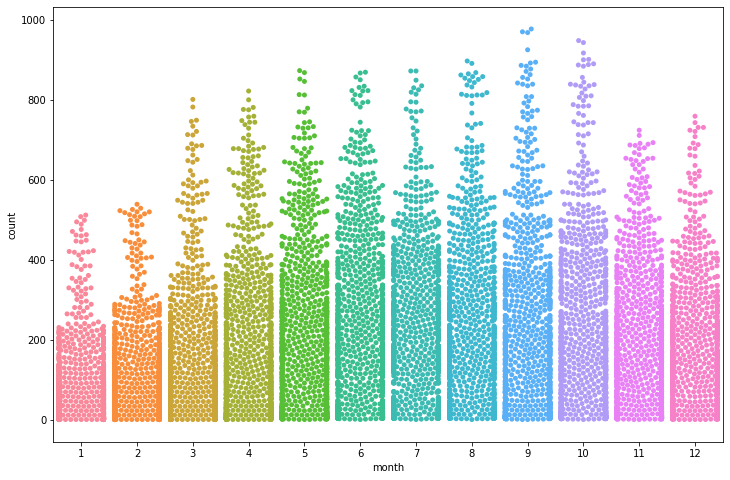

In [81]:
# 가설: 월별로 대여량이 다를 것이다.
plt.figure(figsize=(12, 8))
sns.swarmplot(x=data["month"], y="count", data=data)